# Plotting the Fraction of Dark Matter from Observational Datasets

## Pre-processing

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import h5py
import pandas as pd
import glob
from scipy import stats
from matplotlib.legend_handler import Line2D

#################
# Plot parameters
params = {
    "font.size": 20,
    "font.family": "Arial Black",
    "text.usetex": True,
    "mathtext.fontset": "custom",
    "figure.figsize": (4, 3),
    "figure.subplot.left": 0.15,
    "figure.subplot.right": 0.95,
    "figure.subplot.bottom": 0.16,
    "figure.subplot.top": 0.95,
    "figure.subplot.wspace": 0.3,
    "figure.subplot.hspace": 0.3,
    "lines.markersize": 2,
    "lines.linewidth": 1.5,
}
plt.rcParams.update(params)

In [22]:
sparc = pd.read_csv('../Observational_datasets/dataset/SPARC.csv').to_numpy()
atlas3D = pd.read_csv('../Observational_datasets/dataset/ATLAS3D.csv').to_numpy()
banarbe = pd.read_csv('../Observational_datasets/dataset/BARNABE11.csv').to_numpy()
manga = pd.read_csv('../Observational_datasets/dataset/MANGA.csv').to_numpy()
reyes = pd.read_csv('../Observational_datasets/dataset/Reyes2011.csv').to_numpy()
pizagno = pd.read_csv('../Observational_datasets/dataset/Pizagno2007.csv').to_numpy()
tortora = pd.read_csv('../Observational_datasets/dataset/TORTORA12.csv').to_numpy()


sparc_mass = sparc[:,1]
sparc_Reff = sparc[:,2]
sparc_fDM = sparc[:,3]
sparc_ErrorfDM = sparc[:,4]
Q = sparc[:,5]
select = np.where(Q==1)[0]
sparc_mass = sparc_mass[select]
sparc_fDM = sparc_fDM[select]
sparc_ErrorfDM = sparc_ErrorfDM[select]
sparc_Reff = sparc_Reff[select]


manga_mass = manga[:,2]
manga_fDM = manga[:,4]
manga_Reff= manga[:,3]

select = np.where(manga_fDM>0)[0]

manga_mass = manga_mass[select] 
manga_fDM = manga_fDM[select] 
manga_Reff = manga_Reff[select]

atlas3D_mass = atlas3D[:,1]
atlas3D_fDM = atlas3D[:,3]
atlas3D_Reff = atlas3D[:,2]
Q = atlas3D[:,5]
select = np.where((Q>=3) & (atlas3D_fDM>0))[0]
atlas3D_mass = atlas3D_mass[select]
atlas3D_fDM = atlas3D_fDM[select]
atlas3D_Reff = atlas3D_Reff[select]


barnabe_mass = banarbe[:,1]
barnabe_fDM = banarbe[:,2]
barnabe_Reff = banarbe[:,-1]

tortora_mass = tortora[:,0]
tortora_fDM = tortora[:,1]

reyes_mass = reyes[:,1]
reyes_Reff = reyes[:,2]
reyes_fDM = reyes[:,3]

pizagno_mass = pizagno[:,1]
pizagno_Reff = pizagno[:,2]
pizagno_fDM = pizagno[:,3]


## Plotting the median for dark matter fraction for observational samples from different methods

0.16974423076923081


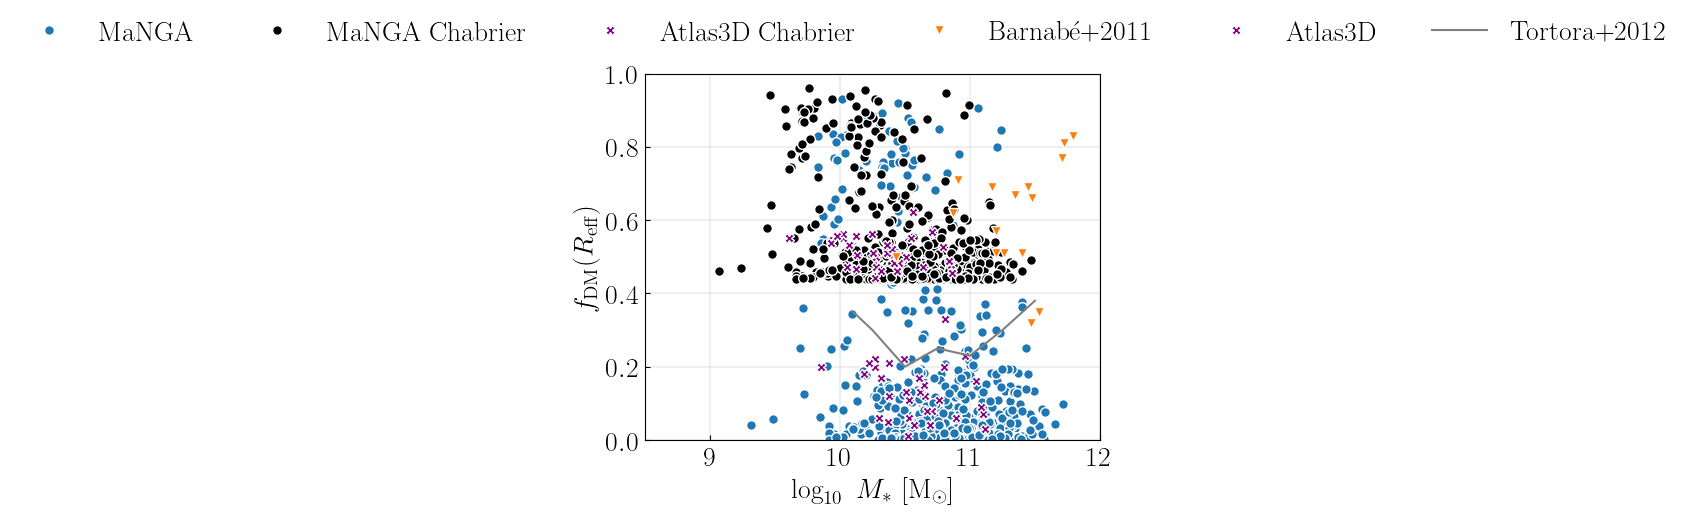

In [28]:
fig = plt.figure(figsize= (6,5))

Mba=[]
for mass in barnabe_mass:
    Mba.append(mass)
Mto=[]
for mass in tortora_mass:
    Mto.append(mass)
    
Mat= []    
for mass in atlas3D_mass:
    Mat.append(mass)

Mma=[]
for mass in manga_mass:
    Mma.append(mass)




manga_fDM2 = 1 + 10**(-0.25)*(manga_fDM-1)
Mma2 = np.log10(Mma)-0.25

atlas3D_fDM2 = 1 + 10**(-0.25)*(atlas3D_fDM-1)
Mat2 = np.log10(Mat)-0.25



print(np.mean(manga_fDM))

plt.xlabel(r'$\log_{10}~M_{*}$ [$\mathrm{M}_{\odot}$]')
plt.ylabel(r'$f_{\mathrm{DM}}(R_{\mathrm{eff}})$')
plt.ylim([0, 1])
plt.xlim([8.5, 12]) # Better in log-scale 
#plt.xscale('log')
plt.grid(linestyle='-', linewidth=0.3)

xticks = np.array([1,min,5,10,15]) # Let's play with the x-ticks
labels = ["1", "min", "5", "10", "15"]
#plt.xticks(xticks, labels)

plt.plot(np.log10(Mma), manga_fDM, 'o', ms=7, color='tab:blue',markeredgecolor='white',lw=0.1,label='MaNGA')
plt.plot(Mma2, manga_fDM2, 'o', ms=7, color='black',markeredgecolor='white',lw=0.1,label='MaNGA Chabrier')
plt.plot(Mat2, atlas3D_fDM2, 'X', ms=7, color='purple',markeredgecolor='white',lw=0.1,label='Atlas3D Chabrier')

plt.plot(np.log10(Mba), barnabe_fDM, 'v', ms=7, color='tab:orange',markeredgecolor='white',lw=0.1,label='Barnabé+2011')

plt.plot(np.log10(Mat), atlas3D_fDM, 'X', ms=7, color='purple',markeredgecolor='white',lw=0.1,label='Atlas3D')
plt.plot(np.log10(Mto), tortora_fDM, '-', ms=7, color='gray', label='Tortora+2012')

#plot_median(Mtot[select], ftot[select], 'Spiral', 'blue')

fig.legend(loc='upper center', fontsize = 20, bbox_to_anchor=(0.5, 1.05), ncol=6, borderaxespad=0.00000001, framealpha=0)


plt.tick_params(direction='in', axis='both', which='both', pad=4.5) # Minor thing
plt.tight_layout()
plt.show()



## Highlight the correlation between dark matter fractions and sizes at a specific mass for various samples

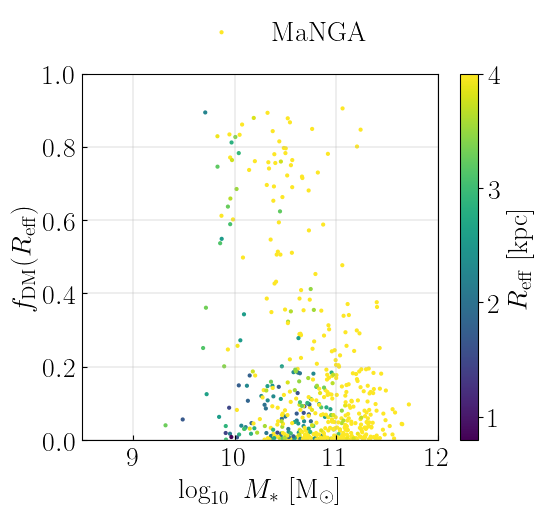

In [16]:
fig = plt.figure(figsize= (6,5))



plt.xlabel(r'$\log_{10}~M_{*}$ [$\mathrm{M}_{\odot}$]')
plt.ylabel(r'$f_{\mathrm{DM}}(R_{\mathrm{eff}})$')
plt.ylim([0, 1])
plt.xlim([8.5, 12]) # Better in log-scale 
#plt.xscale('log')
plt.grid(linestyle='-', linewidth=0.3)

xticks = np.array([1,min,5,10,15]) # Let's play with the x-ticks
labels = ["1", "min", "5", "10", "15"]
#plt.xticks(xticks, labels)


plt.scatter(np.log10(Mma), manga_fDM, c=manga_Reff,label='MaNGA', vmax = 4)
plt.colorbar(label = r'$R_{\mathrm{eff}}$ [kpc]')
#plt.plot(np.log10(Mba), barnabe_fDM, 'v', ms=7, color='tab:orange',markeredgecolor='white',lw=0.1,label='Barnabé+2011')

#plt.plot(np.log10(Mat), atlas3D_fDM, 'X', ms=7, color='purple',markeredgecolor='white',lw=0.1,label='Atlas3D')
#plt.plot(np.log10(Mto), tortora_fDM, '-', ms=7, color='gray', label='Tortora+2012')

#plot_median(Mtot[select], ftot[select], 'Spiral', 'blue')

fig.legend(loc='upper center', fontsize = 20, bbox_to_anchor=(0.5, 1.05), ncol=4, borderaxespad=0.00000001, framealpha=0)


plt.tick_params(direction='in', axis='both', which='both', pad=4.5) # Minor thing
plt.tight_layout()
plt.show()



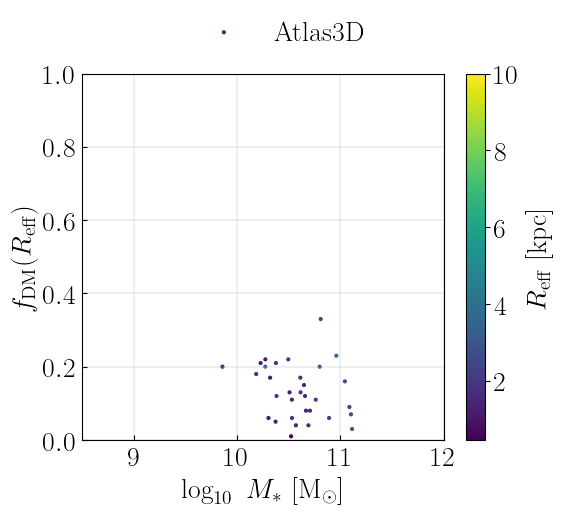

In [17]:
fig = plt.figure(figsize= (6,5))   


plt.xlabel(r'$\log_{10}~M_{*}$ [$\mathrm{M}_{\odot}$]')
plt.ylabel(r'$f_{\mathrm{DM}}(R_{\mathrm{eff}})$')
plt.ylim([0, 1])
plt.xlim([8.5, 12]) # Better in log-scale 

plt.grid(linestyle='-', linewidth=0.3)

xticks = np.array([1,min,5,10,15]) # Let's play with the x-ticks
labels = ["1", "min", "5", "10", "15"]
#plt.xticks(xticks, labels)


plt.scatter(np.log10(Mat), atlas3D_fDM, c=atlas3D_Reff,label='Atlas3D', vmax = 10)
plt.colorbar(label = r'$R_{\mathrm{eff}}$ [kpc]')

fig.legend(loc='upper center', fontsize = 20, bbox_to_anchor=(0.5, 1.05), ncol=4, borderaxespad=0.00000001, framealpha=0)


plt.tick_params(direction='in', axis='both', which='both', pad=4.5) # Minor thing
plt.tight_layout()
plt.show()



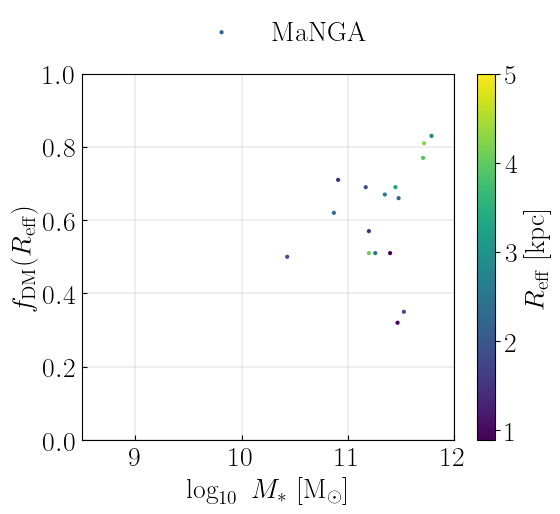

In [20]:
fig = plt.figure(figsize= (6,5))   


plt.xlabel(r'$\log_{10}~M_{*}$ [$\mathrm{M}_{\odot}$]')
plt.ylabel(r'$f_{\mathrm{DM}}(R_{\mathrm{eff}})$')
plt.ylim([0, 1])
plt.xlim([8.5, 12]) # Better in log-scale 

plt.grid(linestyle='-', linewidth=0.3)

xticks = np.array([1,min,5,10,15]) # Let's play with the x-ticks
labels = ["1", "min", "5", "10", "15"]
#plt.xticks(xticks, labels)


plt.scatter(np.log10(Mba), barnabe_fDM, c=barnabe_Reff,label='MaNGA', vmax = 5)
plt.colorbar(label = r'$R_{\mathrm{eff}}$ [kpc]')

fig.legend(loc='upper center', fontsize = 20, bbox_to_anchor=(0.5, 1.05), ncol=4, borderaxespad=0.00000001, framealpha=0)


plt.tick_params(direction='in', axis='both', which='both', pad=4.5) # Minor thing
plt.tight_layout()
plt.show()

